# 1D1V Linear Landau damping

In [1]:
%reload_ext autoreload 
%autoreload 2 

# A. Motivation and primer

Landau damping is the collisionless damping of the electric field in a plasma that transpires by consequence of particles electrostatically exchanging energy with their self-consistent electric potential wave. Linear Landau damping is a basic benchmark for any 1D1V Vlasov solver, and is obtained from Vlasov-Poisson system:

$$\frac{\partial f}{\partial t} + v\frac{\partial f}{\partial x} - \frac{eE}{m}\frac{\partial f}{\partial v} = 0$$

$$\frac{\partial^2 \phi}{\partial x^2} = -\frac{e}{\epsilon_0}(n_i - n_e), \qquad n_{\alpha} = \int_v dv\, f_{\alpha}(t,x,v), \,\,E = -\partial_x \phi$$

Where, for convenience, we consider the case of singly charged positive ions in Poisson's equation, it will be motivated shortly that the electron equation is all that is required to create the damping effect in a <i>cold</i> plasma. Without making any explicit assertions at this point, we elect to partition all dependent quantities as $w = \langle w \rangle + \varepsilon w_1 + \varepsilon^2 w_2 + \ldots$ for a small parameter $\varepsilon$ that is physically identified as having a size proportional to the ratio of the average characteristic displacement from equilibrium (Debye length, $\lambda_D$) to the system size $L$ ($\varepsilon \sim \lambda_D / L$). Thus, higher enumerated terms represent the 1, 2, $\ldots$ order terms that correct the mean value to its observed value. Considering the circumstance where no mean field $\langle E \rangle = 0$ exists for this cold quasineutral plasma $\langle n_i \rangle - \langle n_e \rangle = 0$, so that any electric field $E = \varepsilon E_1 + \varepsilon^2 E_2 + \ldots$ (equivalently, any potential $\phi = \varepsilon \phi_1 + \varepsilon^2 \phi_2 + \ldots$) that develops is exclusively the result of self-consistent fluctuations among the charge species density. Given the ratio $m_i / m_e \simeq 1436$, the electrons are much more mobile, thus it is correct to assert it is the electrons that dominate first order perturbations (first order), hence we can write $n_e = \langle n_e\rangle +  \varepsilon n_{e1} + \varepsilon^2 n_{e2} + \ldots$ and $n_i = \langle n_i \rangle + \varepsilon n_{i1} + \varepsilon^2 n_{i2} + \ldots$ where $|n_{i1}| \ll |n_{e1}|$, hence, to first order, Poisson's equation becomes (where for brevity we label $n_{e1} \equiv n_1$):

$$O(\varepsilon ): \qquad \qquad \frac{\partial^2\phi}{\partial x^2} = +\frac{e}{\epsilon_0}n_1 = \frac{e}{\epsilon_0}\int_v dv f_1(t,x,v)$$

note the order unity equation is a statement of charge neutrality. Inserting the perturbation models defined just above into the Vlasov equation, the order unity equation produces equation of charge continuity, whereas the first order equation provides (writing $\langle f \rangle \equiv f_0)$:

$$O(\varepsilon ): \qquad \qquad \qquad \frac{\partial f_1}{\partial t} + v\frac{\partial f_1}{\partial x} + \frac{qE_1}{m}\frac{\partial f_0}{\partial v} = 0$$


Fourier-Laplace transforming ($\sim \exp (ikx - i\omega t$)), solving for $f_1$ in order to eliminate it in Poisson's equation leads to the following constraint [1]:

$$\phi = \left(\frac{\omega_p^2}{k^2}\int dv \frac{\partial \hat{f}_0}{\partial v}\frac{1}{v - \omega / k}\right)\phi$$

where $$\qquad \omega_p^2 = \langle n_e \rangle e^2 / (m_e\epsilon_0), \quad \hat{f}_0 = f_0 / \langle n_e \rangle$$

which for compatibility requires:

$$1 = \frac{\omega_p^2}{k^2}\int dv \frac{\partial \hat{f}_0}{\partial v}\frac{1}{v - \omega / k}$$

or

$$\epsilon (k,\omega ) = 0, \quad \text{where } \epsilon(k, \omega ) = 1 - \frac{\omega_p^2}{k^2}\int dv \frac{\partial \hat{f}_0}{\partial v}\frac{1}{v - \omega / k}$$

is the dielectric constant for the (cold) plasma. The integral can be integrated by parts [1], whereupon the boundary term vanishes ($f \rightarrow 0$ as $x\rightarrow \pm\infty$), leaving an integral $\sim \int dv (v - \omega / k)^{-2}$. For a phase speed $\omega / k \gg v$, where $v$ is the peculiar velocity of plasma particles, the term can be expanded in the corresponding small parameter $v / (\omega / k)$, and retaining (again) only terms up to first order, produces (in the enforced case where $\text{Im}[\omega ] \ll \text{Re}[\omega ]$, this turns out to be correspondent to the requirement $k\lambda_D \ll 1$, i.e. the wave length of the field is much larger than the typical particle displacement) that [1, p.7],

$$\gamma \equiv \text{Im}[\omega ] = \frac{\pi}{2}\frac{\omega_p^3}{k^2}\left(\frac{\partial \hat{f}_0}{\partial v}\right)_{v = \omega / k}$$ 

where the common notation $\omega = \omega_r + i\gamma $ has been used to denote real and imaginary parts of the wave frequency. Recall this was derived for the case of the wave speed $\omega / k$ being much greater than the thermal velocity, hence for physical distributions (e.g. Maxwellian) we are in a region of very small, but <i>negative</i> slope $\partial \hat{f}_0 / dv$, thus we anticipate $\gamma < 0$  and that the (electric potential)  wave $\sim e^{+\gamma t}$ decays; this is <i>Landau damping</i>. It is a statement that a plasma in thermodynamic equilibrium (i.e. it is a fundamental result of statistical mechanics that the unique function that describes the equilibrium state can only be the Maxwellian distribution) that suffers any smooth perturbation gives rise to electric field fluctuations is damped out globally in time. It is notable that the observation of this damping appears so similar to dissipation that it is a proclivity to incorrectly regard there is some loss of energy; however, the Vlasov-Poisson system has a Hamiltonian which is constant in time. Thus, if the velocities are reversed at any point in time, the initial conditions will be "recovered" at some point whereafter the wave "decays" away just the same [3]. Cedric, in his Fields medal award winning work, recently showed that this linear result holds for the case of nonlinear Landau damping and that the phenomenon is satisfyingly explained as phase mixing, an agent that drives similar damped oscillations in galactic dynamics.

If an initial density $\hat{f}_0$ is known, then this <i>damping constant</i>, $\text{Im}[\omega ] \equiv \gamma$ can be calculated, which can be observed most physically in the decay in the electric field energy, $W_E = \frac{\epsilon_0}{2}|E|^2$.

$$E = E_0 e^{-i\omega t} = E_0e^{-i\omega_r t} e^{i\gamma t}, \qquad \qquad \omega = \omega_r + i\gamma$$

Hence, $W_E = (\epsilon_0 / 2)|E|^2 = (\epsilon_0 / 2) E^* E$

$$W_E = \frac{\epsilon_0}{2}|E_0|^2 \left(e^{-i\omega_r t}e^{\gamma t}\right)\left(e^{+i\omega_r t}e^{\gamma t}\right) = \underbrace{\frac{\epsilon_0}{2}|E_0|^2}_{W_{E0}}\underbrace{|e^{0}|}_{=\, 1} \,\,e^{2\gamma t} = W_{E0} e^{2\gamma t}$$

or

$$\frac{W_E}{W_{E0}} = e^{2\gamma t}, \qquad \gamma < 0 \, \text{ in Landau damping}$$

thus, we have the linear equation in log-space:

$$\ln \frac{W_E}{W_{E0}} = 2 \gamma t$$

where the slope $2\gamma$ can be measured from experimental data or from numerical simulation. 

# B. Goals of this notebook

In this notebook, we use our nonlinear solver DECSKS on the 1D1V Vlasov-Poisson system (see section C for the form of the equations used) using the test density [4]:

$$\hat{f}_0(x,v) = \frac{1}{\sqrt{2\pi}}(1 + \epsilon\cos (k x))e^{-v^2 / 2}, \quad \epsilon = 0.01, k = 0.5$$

The above linear estimate provides $\gamma \simeq -0.153349$, and has been benchmarked by several other codes.

It is aimed to verify both versions of DECSKS (finite difference corrections and Fourier-based corrections) agree and that this quoted damping rate is consistent (inasmuch as the linear theory can agree) with the simulation.  To further establish confidence, we assess the fidelity of both versions of CS by examining a selection of the infinite invariants the Vlasov-Poisson structure.

Note that any functional $C = C(f)$ is an invariant since:

$$\frac{dC}{dt} = \frac{\delta C}{\delta f}\frac{df}{dt} = 0$$

where the Vlason equation ($df/dt = 0$) has been used in the final step, and $\delta$ is the Fréchet derivative operator. Solutions to the Vlasov-Poisson system sit on a Poisson manifold which can be shown to have Casimirs whose form are functionals $C(f) = \int_{\mathcal{D}_v}dv\int_{\mathcal{D}_x}dx G(f)$ which are invariants (of which there are an infinite number). Thus, the $L^p$ norms ($\left(\int_{\mathcal{D}_v}dv\int_{\mathcal{D}_x}dx |f|^p\right)^{1/p}$) are invariants which are themselves an infinite set. The following invariants $I$ will be tracked for the distribution function $f = f(t^n,x_i,v_j) \equiv f^n_{i,j}$ [4]:

<ol>
<li> $\ell^1$ norm: $I_1 = \sum_{ i,j}|f_{i,j}^n|\Delta x \Delta v$
<li> $\ell^2$ norm: $I_2 = \sqrt{\sum_{i,j}(f_{i,j}^n)^2\Delta x \Delta v}$
<li> Total energy $I_W$

<ol> Recall the number density is given by $n(t^n,x_i) \equiv n_i^n = \sum_j f_{i,j}^n \Delta v = n_i^n$, we can cast the energy in two ways:
<li> in terms of the electric potential $\{\phi_i^n\}$: $I_W = \sum_{i}\left(\frac{1}{2}n_i^n v_j^2\right)\Delta x + \left(\sum_i n_0 - n_i^n\right)\phi_i^n\Delta x$
<li> in terms of the electric field $\{E_i^n\}$: $I_W = \sum_{i}\left(\frac{1}{2}n_i^n v_j^2\right)\Delta x + \sum_i \frac{1}{2}|E_i^n|^2$
</ol>
<li> Entropy: $I_S = -\sum_{i,j}f_{i,j}^n \ln (f_{i,j}^n + \varepsilon ) \Delta x \Delta v$
</ol>

where to evade numerical overflow we include a small offset $\varepsilon \sim 10^{-308}$ (i.e. eps = sys.float_info.min in Python). Note, entropy in physical systems is increased by, for example, collisions. Since the Vlasovian plasma does not include collisions, there is no means by which entropy can be increased, hence it remains at a constant value.

The damping of the electric field will be gleaned from the electrostatic portion of the total energy:

<ol start = "5">
<li>
$W_E^n = -\sum_i n_i\phi_i^n \Delta x = \sum_i \frac{1}{2}|E_{i}^n|^2 \Delta x$
</ol>

in our normalized units. In the FD formulation of DECSKS, we solve for $\phi$ making the potential versions for apt for our purposes, whereas the Fourier solver already implemented solves for the electric field.

# C. Setup

We find the numerical solution to the following normalized version of the Vlasov-Poisson/Gauss system [2],

\begin{eqnarray*}
\frac{\partial f}{\partial t} + v\frac{\partial f}{\partial x} + \frac{\partial\phi}{\partial x}\frac{\partial f}{\partial v} = 0, \qquad &  \text{and } & \qquad \
{\partial^2 \phi}{\partial x^2} = \int_v dv f(t,x,v) - n_0  \\[2em]
& \text{or } & \\[2em]
\frac{\partial f}{\partial t} + v\frac{\partial f}{\partial x} - E\frac{\partial f}{\partial v} = 0, \qquad & \text{and } & \qquad \frac{\partial E}{\partial x} = n_0 -  \int_v dv f(t,x,v)
\end{eqnarray*}

$$\text{where } x\in [-2\pi , 2\pi ] , v\in [-7, 7]$$

since $E = -\partial_x \phi$. Note, that the time is measured as multiples of plasma periods, $x$ as multiples of Debye length, and $v$ as multiples of the electron thermal speed (among other normalizations, e.g. on $E$, and $f$). As it so happens, a Poisson solver was developed for the FD formulation making the top equations directly applicable, whereas in the Fourier formulations a Gauss' law solution was obtained instead making the bottom set of equivalent equations what is being solved.

The ion density is taken to be a cold background (constant) value, chosen so that $n_i \equiv n_0$ maintains quasineutrality globally, i.e. equal to the total number of charge carriers $N_e$ over the length of the domain $L = b - a$ that constitute the electron density $n_e \equiv n$. On scales of the Debye length (note that in the Vlasov model above, $x$ has been normalized by $\lambda_D$ so that it measures multiples of the Debye length) localized electric fields are not sufficiently screened out, as computed by Poisson's equation/Gauss' law. To find the value of the ion background density, we calculate the total number of electrons $N_e$ for the initial distribution:

$$N_e = \int_a^b dx \int_v dv f(t,x,v) = \int_a^b dx \int_v dv f_0(x,v)$$

then, since the number of positive ions, $\int_a^b dx n_0$, must equal this number, and $n_0 = \text{const}$, we have

$$n_0 = \frac{N_e}{b - a}$$

We reproduce Güçlü's [4] test case, where two simulations are explored: a coarse and a fine simulation whose characteristics are summarized in the subsequent results sections. Though, given the high performance of the Fourier method, we find that much coarser meshes are possible for the $FN$ methods, whereas more resolved meshes for finite difference $FDN$ methods are needed.

# D. Fourier corrected CS solutions ($FN$ methods)

Here, we use a Fourier-based calculation for the higher order corrections on convected scheme as well as a Fourier based Gauss' law solver. The two simulations are characterized by:


 <table style="width:100%">
  <caption>1D1V VP simulation parameters for $x\in [-2\pi , 2\pi]$, $v\in [-7,7]$, $t\in [0, 60]$ using $F21$-$CS$, Fourier-based corrections</caption>
  <tr>
    <th>simulation</th>
    <th>CS solver and $\text{LTE}$</th>
    <th>time integrator, $\text{LTE}$</th>
    <th>Gauss solver</th>
    <th>$N_x$</th>
    <th>$N_v$</th>
    <th>$N_t$</th>
    <th>input files (store in DECSKS/etc/)*,**</th>
    <th>output files directory</th>
  </tr>
  <tr>
    <td>s7-01</td>
    <td>Fourier, $O(\Delta x^{22}), O(\Delta v^{22})$</td>
    <td>O6-4, $O(\Delta t^5)$</td>
    <td>Fourier</td>
    <td>$8$</td>
    <td>$256$</td>
    <td>$60$</td>
    <td><ol><li><a href = "./pyfiles/DECSKS/etc/params_Nx8Nv256F21_O6-4.dat">params_DECSKS-07_Nx8Nv256F21_O6-4.dat</a>          
    <li><a href = "./pyfiles/DECSKS/etc/params_output_DECSKS-07_Nx8Nv256F21_O6-4.dat">params_output_DECSKS-07_Nx8Nv256F21_O6-4.dat</ol></a></td>
    <td>DECSKS/etc/Landau_--_Nx8Nv256F21_O6-4/</td>
  </tr>
  <tr>
    <td>s7-02</td>
    <td>Fourier, $O(\Delta x^{22}), O(\Delta v^{22})$</td>
    <td>O11-6, $O(\Delta t^7)$</td>
    <td>Fourier</td>
    <td>$16$</td>
    <td>$512$</td>
    <td>$600$</td>  
    <td><ol><li><a href = "./pyfiles/DECSKS/etc/params_DECSKS-07_Nx16Nv512F21_O11-6.dat">params_DECSKS-07_Nx16Nv512F21_O11-6.dat</a>           
    <li><a href = "./pyfiles/DECSKS/etc/params_output_DECSKS-07_Nx16Nv512F21_O11-6.dat">params_output_DECSKS-07_Nx16Nv512F21_O11-6.dat</a></ol></td></td>
    <td>DECSKS/etc/Landau_--_Nx16Nv512F21_O11-6/</td>
  </tr>
  <tfoot><tr><td colspan="9"> *store input files in DECSKS/etc/
  $${}$$
  ** to run a simulation with the provided input file, line 35 in DECSKS/main.py must be modified to read file 1 in the above list for the corresponding simulation. e.g. line 35 reads 
$${}$$
sim_params = DECSKS.lib.read.inputfile('./etc/params.dat')
$${}$$
To run a simulation, change './etc/params.dat' to './etc/params_DECSKS-07_Nx8Nv256F21_O6-4.dat' or './etc/params_DECSKS-07_Nx16Nv512F21_O11-6.dat'. Then execute DECSKS in a terminal
$${}$$
~/pyfiles/DECSKS/<span>$</span> ./main.py
</td></tr></tfoot>
</table>

The output data files that record the invariants and electrostatic energy at each time step are stored in DECSKS/etc/Landau_--_Nx8Nv256F21_O6-4/ or DECSKS/etc/Landau_--_Nx16Nv512F21_O11-6/ , we list them for convenience

<b>output data files: s7-02 simulation</b>

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_I1">out_I1</a> ($L^1$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_I2">out_I2</a> ($L^2$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_IW">out_IW</a> (total energy $I_W$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_S">out_S</a> (entropy $S$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_WE">out_WE</a> (electrostatic energy $W_E$)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-01/out_simtimes">out_simtimes</a> (processor time data)

<b>output data files: s7-02 simulation</b>

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_I1">out_I1</a> ($L^1$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_I2">out_I2</a> ($L^2$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_IW">out_IW</a> (total energy $I_W$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_S">out_S</a> (entropy $S$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_WE">out_WE</a> (electrostatic energy $W_E$)

<a href = "./pyfiles/DECSKS/etc/outputs/s7-02/out_simtimes">out_simtimes</a> (processor time data)

We plot the four discrete invariants $I_1, I_2, I_W, I_S$ as defined in section B. The plots can be generated from the main function of (pyfiles/DECSKS/bin/DECSKS07_error_in_invariants_calcs.py) per DECSKS07_error_in_invariants_calcs.main(scheme = 'fourier'). 

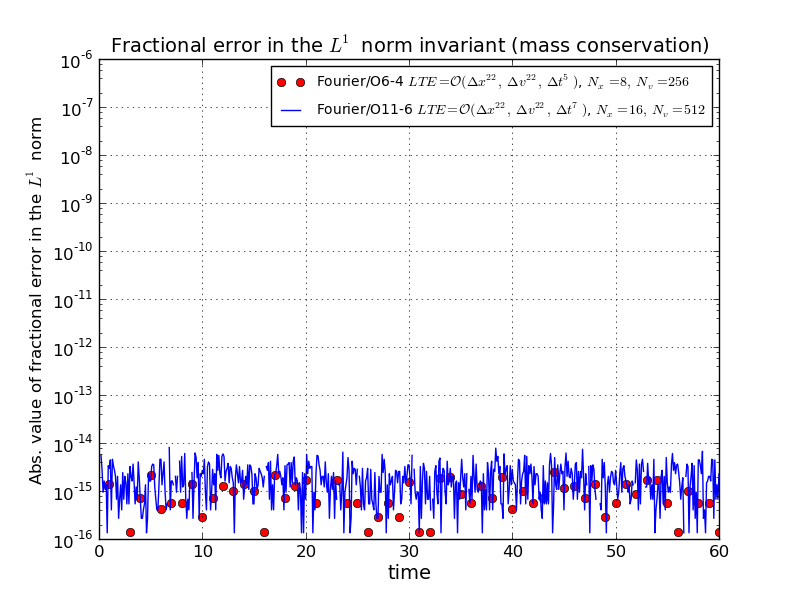

In [3]:
from IPython.display import Image
Image(filename='./fig/I1_-_F21.png')

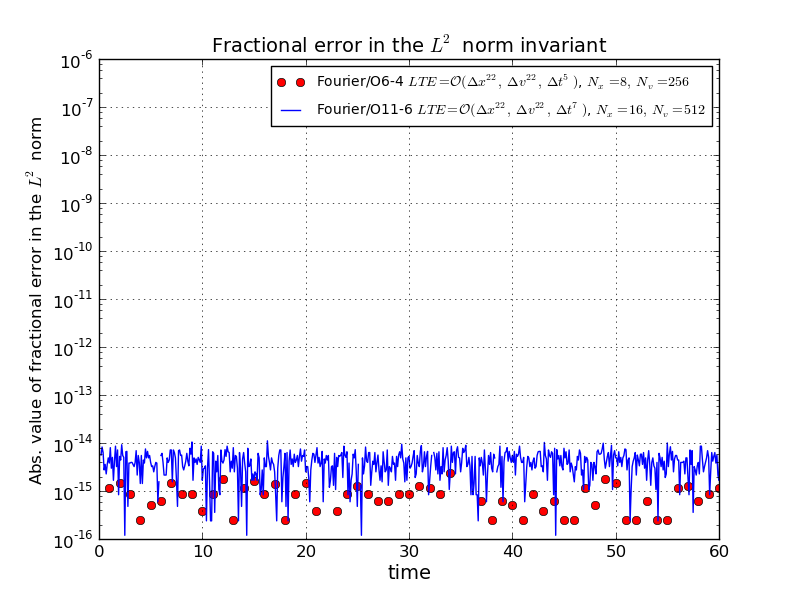

In [4]:
Image(filename='./fig/I2_-_F21.png')

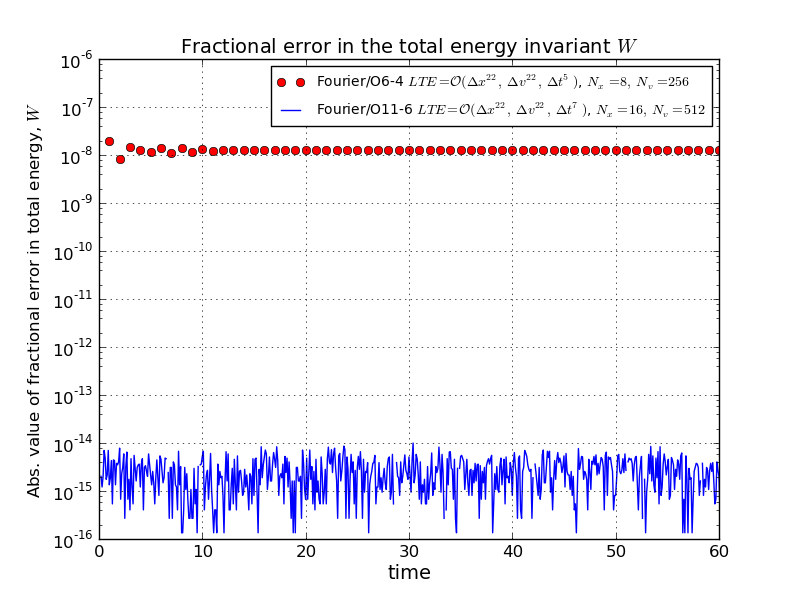

In [5]:
Image(filename='./fig/IW_-_F21.png')

The fine simulation conserves the invariants $I_1$, $I_2$, $W$ to within machine precision ($\sim 10^{-16}$). In addition the coarse simulation preserves the $L^1$ norm invariant to the same precision as well, this is intrinsic to the scheme being used. Since convected scheme is mass conservative, and the $L^1$ norm represents this quantity, the mass (density) in one cell is not lost but only reallocated after each time step to different cell centers. The coarse simulation also conserves the $L^2$ to within similar accuracy. The first definite sign of deviation in the above plots is in the total energy $W$, which should remain constant for the entire simulation. The coarse simulation conserves it to a precision $\sim 10^{-8}$, whereas the fine simulation attains nearly machine precision. Similarly, the entropy is a invariant that tends to be challenging for numerical schemes to maintain. The fine simulation conserves it to within $\sim 10^{-14}$ at each time step, whereas the coarse simulation initially is seen to perform quite well ($\sim 10^{-15}$), better than the fine simulation) but after only 5 time steps, the coarse simulation shows the entropy begins to increase gradually as time increases rounding off at $\sim 10^{-11}$.

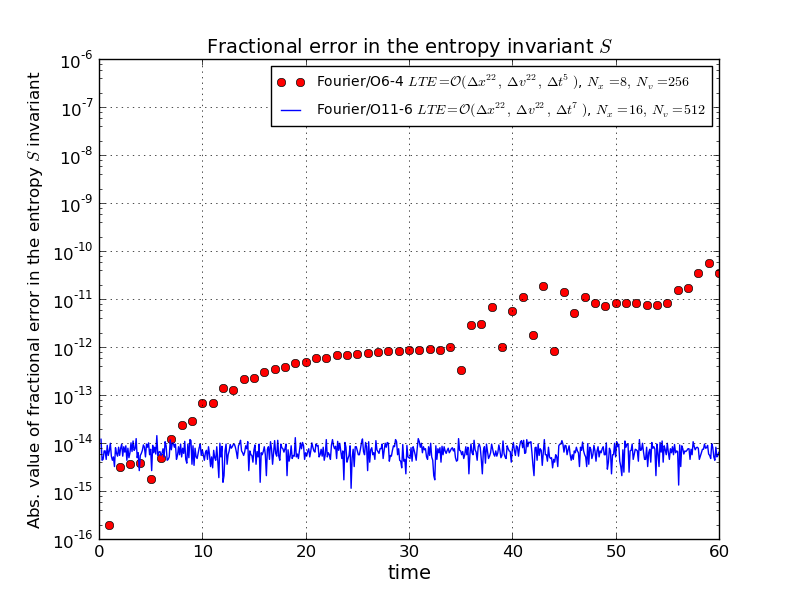

In [6]:
Image(filename='./fig/IS_-_F21.png')

Next, we examine the electrostatic energy $W_E (t^n) = \frac{1}{2}\sum_i|E(t^n,x_i)|^2$. According to linear Landau damping theory, this energy should decay with a constant $\gamma \simeq -0.153349$ for this distribution as reported in section B. The solver here is nonlinear, and it was shown by Cedric et. al that the nonlinear theory of Landau damping maintains that the observed effect is a linear phenomenon and persists in the nonlinear case.

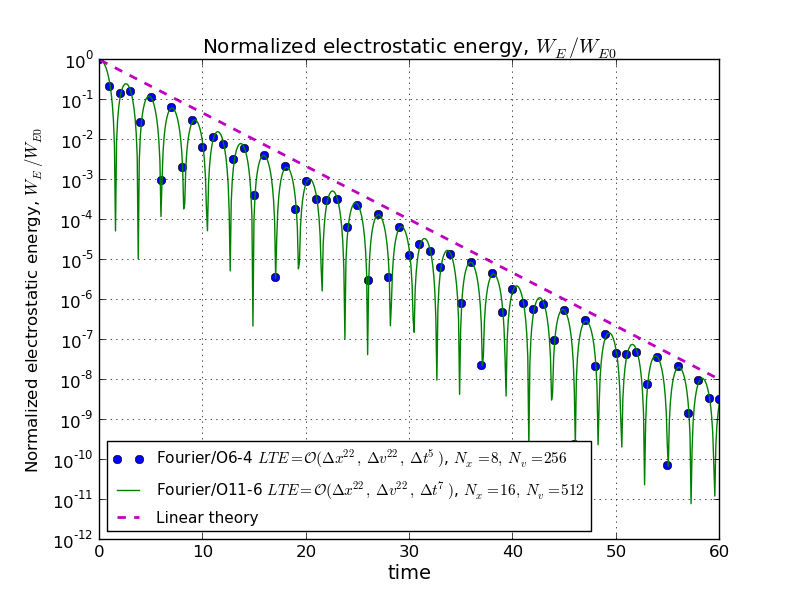

In [7]:
Image(filename='./fig/WE_-_F21.png')

Thus, we see the Fourier corrections to CS produce the anticipated results for Landau damping. The invariants are conserved to a satisfying precision, and the electrostatic energy decays in agreement with the linear theory.

# E. Finite difference corrected CS solutions ($FDN$ methods)

Here, we use <a href = "../DECSKS-01 -- Generation of families of explicit finite difference schemes for derivatives of any order of chosen LTE/DECSKS-01 -- Generation of families of explicit finite difference schemes for derivatives of any order of chosen LTE.ipynb">explicit finite difference schemes</a> for the calculation of the higher order corrections on convected scheme (8th order LTE, i.e. $FD7$ scheme) as well as a finite difference based <a href = "../DECSKS-04 -- Design of a 6th order FD Poisson solver/DECSKS-04 -- Design of a 6th order FD Poisson solver.ipynb">6th order (LTE) Poisson's equation solver</a>. The two simulations ('coarse' and 'fine') are summarized below. Note, that significantly more $x$-gridpoints are needed in the FD formulation to have convergent and accurate derivatives. Hence, another simulation with a more resolved $x$-grid is also included. For the coarse simulation we decide to use a lower order time splitting scheme (here, leapfrog 2 [LF2]) given the computational expense for the additional gridpoints adds significant processor time as compared to the Fourier methods in section D. For the others, we compromise on using O6-4.

 <table style="width:100%">
  <caption>1D1V VP simulation parameters for $x\in [-2\pi , 2\pi]$, $v\in [-7,7]$, $t\in [0, 60]$ using $FD7$-$CS$, finite difference based corrections</caption>
  <tr>
    <th>simulation</th>
    <th>CS solver and $\text{LTE}$</th>
    <th>time integrator, $LTE$</th>
    <th>Poisson solver</th>
    <th>$N_x$</th>
    <th>$N_v$</th>
    <th>$N_t$</th>
    <th>input files (store in DECSKS/etc/)**</th>
    <th>output files directory</th>
  </tr>
  <tr>
    <td>s7-03</td>
    <td>FD, $O(\Delta x^8), O(\Delta v^8)$</td>
    <td>LF2, $O(\Delta t^3)$</td>
    <td>FD, $O(\Delta x^6)$</td>
    <td>$384$</td>
    <td>$256$</td>
    <td>$60$</td>
    <td><ol><li><a href = "./pyfiles/DECSKS/etc/params_Nx8Nv256FD7_O6-4.dat">params_DECSKS-07_Nx8Nv256FD7_O6-4.dat</a>          
    <li><a href = "./pyfiles/DECSKS/etc/params_output_DECSKS-07_Nx8Nv256FD7_O6-4.dat">params_output_DECSKS-07_Nx8Nv256FD7_O6-4.dat</ol></a></td>
    <td>DECSKS/etc/Landau_--_Nx8Nv256FD7_O6-4/</td>
  </tr>
  <tr>
    <td>s7-04</td>
    <td>FD, $O(\Delta x^8), O(\Delta v^8)$</td>
    <td>O6-4, $O(\Delta t^5)$</td>
    <td>FD, $O(\Delta x^6)$</td>
    <td>$384$</td>
    <td>$512$</td>
    <td>$200$</td>  
    <td><ol><li><a href = "./pyfiles/DECSKS/etc/params_DECSKS-07_Nx16Nv512FD7_O11-6.dat">params_DECSKS-07_Nx384Nv512FD7_O11-6.dat</a>           
    <li><a href = "./pyfiles/DECSKS/etc/params_output_DECSKS-07_Nx16Nv512FD7_O11-6.dat">params_output_DECSKS-07_Nx16Nv512FD7_O11-6.dat</a></ol></td></td>
    <td>DECSKS/etc/Landau_--_Nx384Nv512FD7_O11-6/</td>
  </tr>
    <tr>
    <td>s7-05</td>
    <td>FD, $O(\Delta x^8), O(\Delta v^8)$</td>
    <td>O6-4, $O(\Delta t^5)$</td>
    <td>FD, $O(\Delta x^6)$</td>
    <td>$768$</td>
    <td>$512$</td>
    <td>$60$</td>  
    <td><ol><li><a href = "./pyfiles/DECSKS/etc/params_DECSKS-07_Nx768Nv256FD7_O11-6.dat">params_DECSKS-07_Nx768Nv256FD7_O6-4.dat</a>           
    <li><a href = "./pyfiles/DECSKS/etc/params_output_DECSKS-07_Nx768Nv256FD7_O11-6.dat">params_output_DECSKS-07_Nx768Nv256FD7_O6-4.dat</a></ol></td></td>
    <td>DECSKS/etc/Landau_--_Nx384Nv512FD7_O11-6/</td>
  </tr>
  <tfoot><tr><td colspan="9"> *store input files in DECSKS/etc/
  $${}$$
  ** to run a simulation with the provided input file, line 35 in DECSKS/main.py must be modified to read file 1 in the above list for the corresponding simulation. e.g. line 35 reads 
$${}$$
sim_params = DECSKS.lib.read.inputfile('./etc/params.dat')
$${}$$
To run a simulation, change './etc/params.dat' to './etc/params_DECSKS-07_Nx8Nv256FD7_O6-4.dat' or './etc/params_DECSKS-07_Nx16Nv512FD7_O11-6.dat'. Then execute DECSKS in a terminal
$${}$$
~/pyfiles/DECSKS/<span>$</span> ./main.py
</td></tr></tfoot>
</table>

Recalling that it is <a href = "../DECSKS-03 -- Convergence of FD formulation of high order CS/DECSKS-03 --Convergence of FD formulation of high order CS.ipynb">challenging for a given mesh size to simultaneously have all FD formulations of derivatives be convergent</a>, especially if we require a large number (i.e. to correct CS up to an $LTE$ order $N+1$ requires derivatives of order $1, 2, \ldots , N-1$), this limits the accuracy that CS can be corrected up to. In our previous experience, the maximum is up to an $LTE$ of order 10. To be safe, we choose to employ an FD corrected CS up to LTE order 8 (and, global error of order 7), i.e. an $FD7$ scheme. Because of the increased number of gridpoints involved and computational expense, we employ lower order time integrators. For the coarse simulation we use LF2, and for the fine simulation we try O6-4. Using $N_x = 384$ has been shown in test cases to produce accuracy on smooth derivatives to within an error of $10^{-12}$. Thus, we anticipate the time splitting will be the controller of accuracy here.

The output data files that record the invariants and electrostatic energy at each time step are stored in DECSKS/etc/Landau_--_Nx8Nv256F21_O6-4/ or DECSKS/etc/Landau_--_Nx16Nv512F21_O11-6/ , we list them for convenience


<b>output data files: coarse simulation</b>

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_I1">out_I1</a> ($L^1$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_I2">out_I2</a> ($L^2$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_IW">out_IW</a> (total energy $I_W$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_S">out_S</a> (entropy $S$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_WE">out_WE</a> (electrostatic energy $W_E$)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx8Nv256F21_O6-4/out_simtimes">out_simtimes</a> (processor time data)

<b>output data files: fine simulation</b>

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_I1">out_I1</a> ($L^1$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_I2">out_I2</a> ($L^2$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_IW">out_IW</a> (total energy $I_W$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_S">out_S</a> (entropy $S$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_WE">out_WE</a> (electrostatic energy $W_E$)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx16Nv512F21_O11-6/out_simtimes">out_simtimes</a> (processor time data)

<b>output data files: s7-3 simulation</b>

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_I1">out_I1</a> ($L^1$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_I2">out_I2</a> ($L^2$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_IW">out_IW</a> (total energy $I_W$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_S">out_S</a> (entropy $S$ invariant)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_WE">out_WE</a> (electrostatic energy $W_E$)

<a href = "./pyfiles/DECSKS/etc/outputs/Landau_--_Nx768Nv256FD7_O6-4/out_simtimes">out_simtimes</a> (processor time data)

For the electrostatic energy, the FD simulation agrees with linear theory and the Fourier numerical solution, but departs around the halfway point in the simulation. The same is seen for the $I_2$ and $I_S$ invariants (While the other invariants $I_1$ and $W_E$ agree steadily to within their precision). The invariants $I_2$ and $I_S$ suffer sharp increases midway through the simulation which settle on values on somewhat constant values on either side of this.

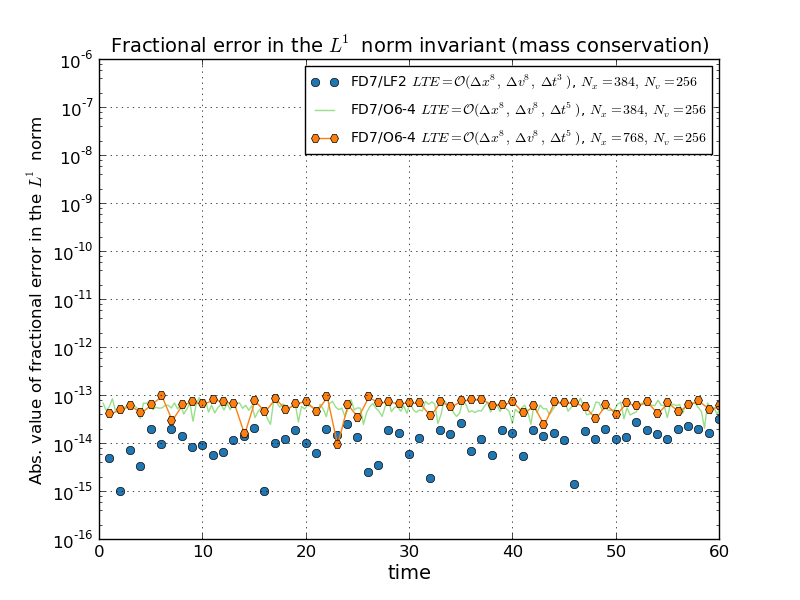

In [15]:
Image(filename='./fig/I1_-_FD7.png')

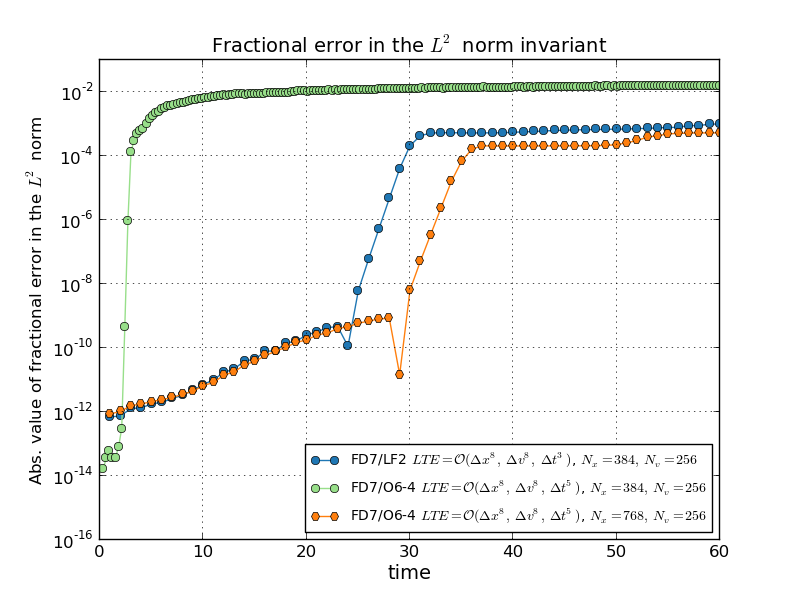

In [16]:
Image(filename='./fig/I2_-_FD7.png')

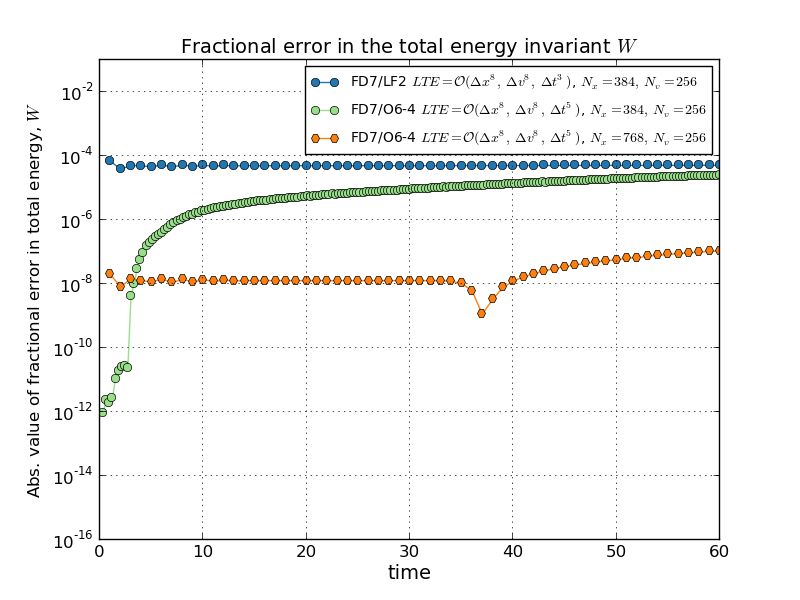

In [17]:
Image(filename='./fig/IW_-_FD7.png')

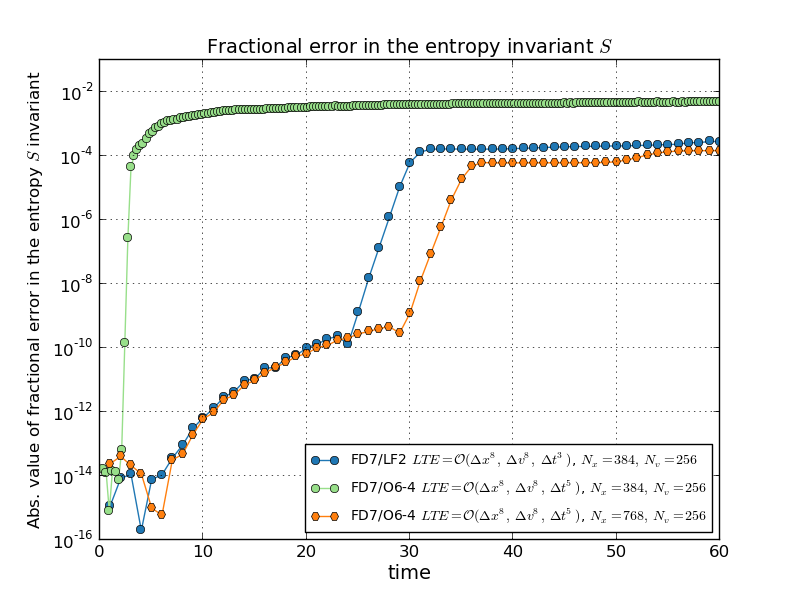

In [18]:
Image(filename='./fig/IS_-_FD7.png')

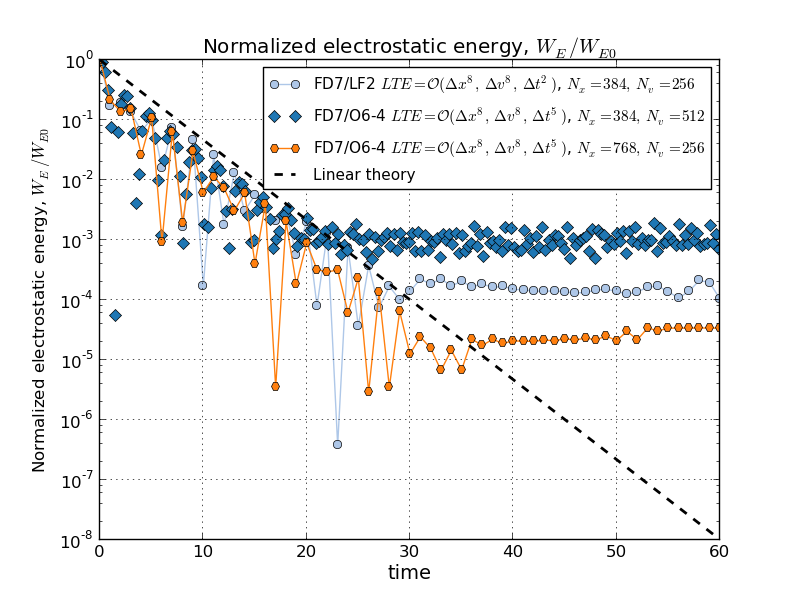

In [19]:
Image(filename='./fig/WE_-_FD7.png')

This seems to demonstrate the failure of CS-FD to perform for long times is a problem of convergence rather than implementation error. To illustrate the idea directly, we run a Fourier based corrected CS simulation (F7) to the same order LTE of 8 and plot it alongside the refined mesh FD7 case of the same order.

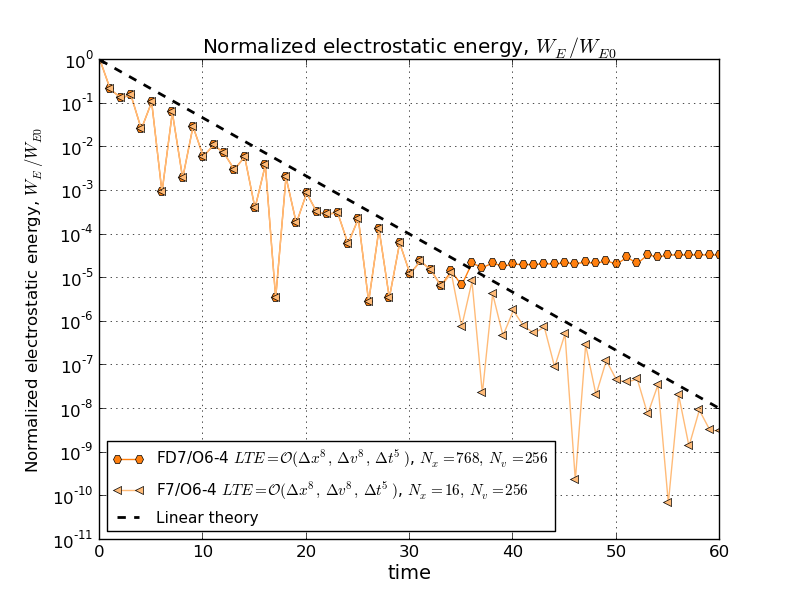

In [20]:
Image(filename='./fig/WE_-_FD7_vs_F7.png')

Since the only significant difference between the two simulations is how the corrections (Fourier vs. FD) are computed. Since the two simulations agree for some time throughout the simulation visually quite well, it must be an issue with the convergence of the FD derivatives. The derivatives themselves must be too difficult to resolve through the FD methods. It was seen just above that this departure from the expected linear damping for coarser meshes under CS-FD occured earlier in time. This is consistent with the idea that higher resolution meshes were able to resolve sharper derivatives than the coarse mesh could, so the coarse mesh could only work up until a certain threshold. Still, in this plot here comparing FD7 with F7, FD7 cannot meet the demands of sharp gradients throughout the entire simulation that result. It should be the case that longer time simulations will give accurate results if the grid is refined in both phase space variables.

# References

[1] http://www.physics.sfsu.edu/~lea/courses/grad/vlasov.PDF

[2] http://www.math.ist.utl.pt/~jnatar/MG-03/Marsden/ms_book_ch10.pdf

[3] http://farside.ph.utexas.edu/teaching/plasma/Plasmahtml/node85.html

[4] Y. Güçlü, A.J. Christlieb and W.N.G. Hitchon, Arbitrarily high order Convected Scheme solution of the Vlasov-Poisson system (2013).

[5] P. J. Morrison. Hamiltonian description of the ideal fluid. Rev. Mod. Phys., 70:467–521, 1998.